Training Data Shape: (12, 2), Labels Shape: (12, 1)
Test Data Shape: (3, 2), Labels Shape: (3, 1)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Wind_Angle          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Height_Ratio        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 2)         │          0 │ Wind_Angle[0][0], │
│ (Concatenate)       │                   │            │ Height_Ratio[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 512)       │      1,536 │ concatenate_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 512)       │          0 │ dense_43[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 256)       │    131,328 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 256)       │          0 │ dense_44[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 128)       │     32,896 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 64)        │      8,256 │ dense_45[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 1)         │         65 │ dense_46[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 174,081 (680.00 KB)

 Trainable params: 174,081 (680.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.9893 - val_loss: 0.3323
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 3.9145 - val_loss: 0.9679
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 1.7695 - val_loss: 1.3883
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 2.3766 - val_loss: 1.1865
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 3.0452 - val_loss: 0.7109
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 1.9249 - val_loss: 0.4328
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 2.4108 - val_loss: 0.3176
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2.6855 - val_loss: 0.2786
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 2.1388 - val_loss: 0.2416
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.9426 - val_loss: 0.2100
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 2.0990 - val_loss: 0.2161
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 1.5806

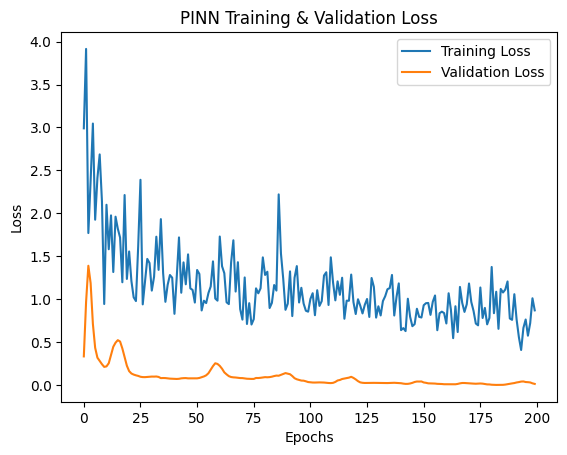

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Predicted Mean Pressure Coefficients:
Wind Angle 0.0°: Predicted Cp = -0.3908
Wind Angle 23.0°: Predicted Cp = -0.3973
Wind Angle 60.0°: Predicted Cp = -0.3692
Wind Angle 90.0°: Predicted Cp = -0.3473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Final R² Score: 0.9529


In [14]:
import numpy as np
import scipy.io as sio
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Enable GPU if available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)

# Regex Pattern for File Parsing
pattern = re.compile(r'Cp_ts_(RAH\d+)_deg(\d+).mat')

# Function to Load `.mat` Data
def load_and_process_mat_files(directory):
    X_data, Y_data, metadata = [], [], []

    for file in os.listdir(directory):
        if file.endswith(".mat"):
            match = pattern.search(file)
            if match:
                height_ratio = match.group(1)
                wind_angle = float(match.group(2))

                file_path = os.path.join(directory, file)
                mat_data = sio.loadmat(file_path)

                if 'Wind_pressure_coefficients' in mat_data:
                    mean_Cp = np.mean(mat_data['Wind_pressure_coefficients'])
                    X_data.append([wind_angle, height_ratio])
                    Y_data.append(mean_Cp)
                    metadata.append([file, wind_angle, height_ratio])
                else:
                    print(f"Skipping {file}: 'Wind_pressure_coefficients' not found.")

    return np.array(X_data, dtype=object), np.array(Y_data, dtype=np.float32).reshape(-1, 1), metadata

# Data Directory
data_directory = "C:/Users/rrsuj/Downloads/capstone/data"
X, Y, metadata = load_and_process_mat_files(data_directory)

# Encode Height Ratios
unique_height_ratios = sorted(set(m[2] for m in metadata))
height_ratio_to_num = {h: i for i, h in enumerate(unique_height_ratios)}
X[:, 1] = np.array([height_ratio_to_num[m[2]] for m in metadata], dtype=np.float32)

# Normalize Inputs (Wind Angle & Height Ratio)
X[:, 0] = X[:, 0].astype(np.float32) / 180.0
X = X.astype(np.float32)

# **New: StandardScaler for Cp**
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y)

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, Labels Shape: {Y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, Labels Shape: {Y_test.shape}")

# **🔧 Updated Model with More Layers & ReLU**
def build_pinn():
    input_wind_angle = Input(shape=(1,), name="Wind_Angle")
    input_height_ratio = Input(shape=(1,), name="Height_Ratio")

    merged = Concatenate()([input_wind_angle, input_height_ratio])

    z = Dense(512, activation="relu", kernel_initializer="he_normal")(merged)
    z = Dropout(0.3)(z)
    y = Dense(256, activation="relu", kernel_initializer="he_normal")(z)
    y = Dropout(0.3)(y)
    x = Dense(128, activation="relu", kernel_initializer="he_normal")(y)
    x = Dense(64, activation="relu", kernel_initializer="he_normal")(x)
    output = Dense(1, activation="linear")(x)

    model = Model(inputs=[input_wind_angle, input_height_ratio], outputs=output)
    return model

# Compile & Train
pinn_model = build_pinn()
pinn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss="mse")

pinn_model.summary()

history = pinn_model.fit(
    [X_train[:, 0].reshape(-1, 1), X_train[:, 1].reshape(-1, 1)], Y_train,
    validation_data=([X_test[:, 0].reshape(-1, 1), X_test[:, 1].reshape(-1, 1)], Y_test),
    epochs=200, batch_size=64, verbose=1
)

# Plot Training Loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("PINN Training & Validation Loss")
plt.show()

# Test Predictions
test_angles = np.array([[0], [23], [60], [90]]) / 180.0
test_height_ratios = np.array([height_ratio_to_num["RAH06"]] * len(test_angles)).reshape(-1, 1)

predicted_Cp = pinn_model.predict([test_angles, test_height_ratios])

# Inverse Transform Predictions
predicted_Cp = scaler_y.inverse_transform(predicted_Cp)

# Display Predictions
print("\nPredicted Mean Pressure Coefficients:")
for i, angle in enumerate(test_angles.flatten() * 180):
    print(f"Wind Angle {angle}°: Predicted Cp = {predicted_Cp[i][0]:.4f}")

# Compute Final R² Score
y_pred = pinn_model.predict([X_test[:, 0].reshape(-1, 1), X_test[:, 1].reshape(-1, 1)])
y_pred = scaler_y.inverse_transform(y_pred)
Y_test_original = scaler_y.inverse_transform(Y_test)

r2 = r2_score(Y_test_original.flatten(), y_pred.flatten())
print(f"\nFinal R² Score: {r2:.4f}")
